# FPL Graph Creation Notebook

## Notebook to create the graphs to show how different members of leagues/friend groups have progressed throughout the season

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [2]:
DF = pd.read_csv('FPL_weekly_tracker.csv')
DF.head()

,Team ID,Owner Name,Team Name,Gameweek 1,Gameweek 2,Gameweek 3,Gameweek 4,Gameweek 5,Gameweek 6,Gameweek 7,...,Gameweek 29,Gameweek 30,Gameweek 31,Gameweek 32,Gameweek 33,Gameweek 34,Gameweek 35,Gameweek 36,Gameweek 37,Gameweek 38
0,6094486,Charlie Smith,Haalandaise sauce,70,47,57,78,42,105,36,...,22,55,69,62,84,74,61,NaN,NaN,NaN
1,1086507,Charlotte Jones,cheesy garnachos,81,62,42,76,44,55,61,...,13,62,60,49,79,63,40,NaN,NaN,NaN
2,2654272,David Hammond,Get it Don,67,38,48,68,46,78,42,...,36,48,44,63,98,129,64,NaN,NaN,NaN


### Weekly Points Line Graph

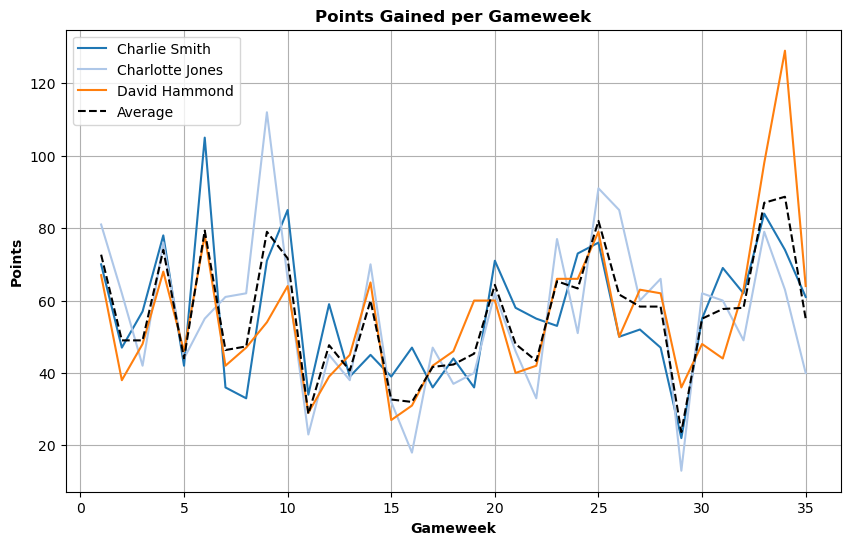

In [45]:
gameweeks = DF.columns[3:]
team_names = DF['Owner Name'].unique()

colors = plt.cm.tab20.colors

# Plotting
plt.figure(figsize=(10, 6))

# Plot individual team points
for i, team_name in enumerate(team_names):
    team_data = DF[DF['Owner Name'] == team_name]
    points = [team_data[f'Gameweek {i}'].iloc[0] for i in range(1, len(gameweeks) + 1)]
    plt.plot(range(1, len(gameweeks) + 1), points, label=team_name, color=colors[i])

average_points = DF[gameweeks].mean()
plt.plot(range(1, len(gameweeks) + 1), average_points, linestyle='--', color='black', label='Average')

plt.xlabel('Gameweek', fontweight='bold')
plt.ylabel('Points', fontweight='bold')
plt.title('Points Gained per Gameweek', fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('Points Gained per Gameweek.jpg')
plt.show()

### Total Points Talley Line Graph

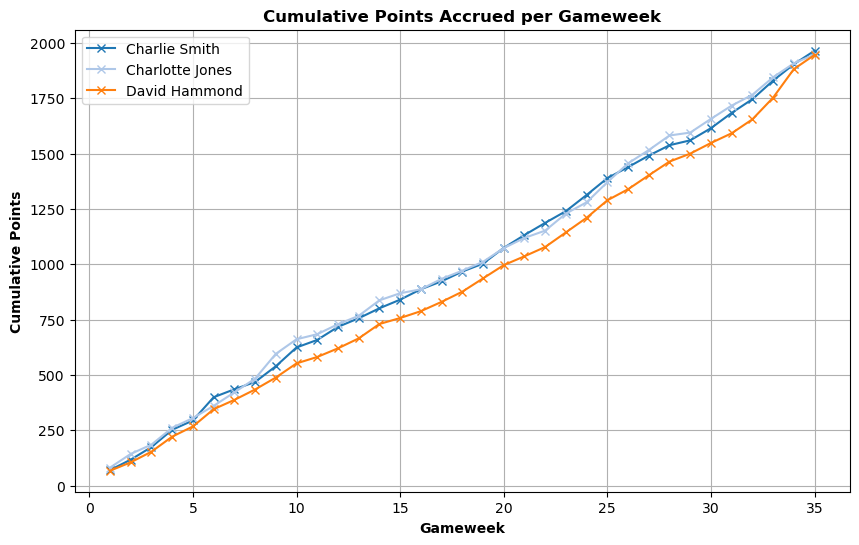

In [46]:
colors = plt.cm.tab20.colors

# Plotting
plt.figure(figsize=(10, 6))

# Plot cumulative points for each team
for i, team_name in enumerate(team_names):
    team_data = DF[DF['Owner Name'] == team_name]
    cumulative_points = team_data[gameweeks].cumsum(axis=1)  # Calculate cumulative sum of points for each gameweek
    plt.plot(range(1, len(gameweeks) + 1), cumulative_points.iloc[0], marker='x', label=team_name, color=colors[i])

plt.xlabel('Gameweek', fontweight='bold')
plt.ylabel('Cumulative Points', fontweight='bold')
plt.title('Cumulative Points Accrued per Gameweek', fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('Cumulative Points Accrued per Gameweek.jpg')
plt.show()


### Proportion of weeks in the lead

In [14]:
gameweeks = DF.columns[3:]
player_names = DF['Owner Name'].unique()

# Initialize an empty DataFrame to store cumulative points for each player in every gameweek
cumulative_totals_df = pd.DataFrame(columns=player_names, index=gameweeks)

# Calculate cumulative points for each player in every gameweek
for gw in gameweeks:
    for player_name in player_names:
        player_data = DF[DF['Owner Name'] == player_name]
        cumulative_points = player_data[gameweeks[:gameweeks.get_loc(gw) + 1]].sum(axis=1)
        cumulative_totals_df.at[gw, player_name] = cumulative_points.iloc[0]

# Convert string values to numeric values
cumulative_totals_df = cumulative_totals_df.apply(pd.to_numeric)

# Add a new column indicating which person has the highest point total
cumulative_totals_df['Highest Scorer'] = cumulative_totals_df.idxmax(axis=1)


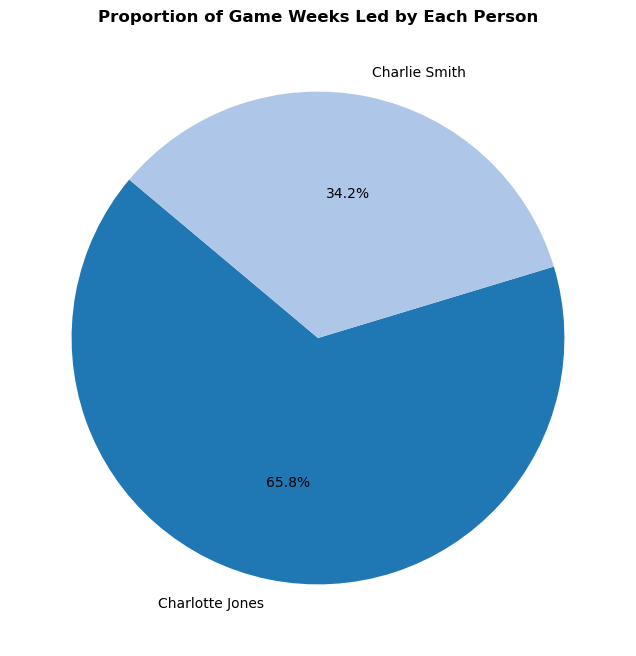

In [43]:
winner_counts = cumulative_totals_df['Highest Scorer'].value_counts()
colors = plt.cm.tab20.colors

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Game Weeks Led by Each Person', fontweight='bold')
plt.savefig('Proportion of Weeks Led by Each Individual.jpg')
plt.show()


### Weekly distance to the leader
Whoever is winning in a given week is given a value of 0 with the positive distance being the number of points the individual is behind

In [8]:
#making all of the points terms integers so they work in the following analysis
DF2 = DF.copy()

# Convert gameweek columns data to integers
for column in DF2.columns[3:]:  # Selecting only gameweek columns
    DF2[column] = pd.to_numeric(DF2[column], errors='coerce')


In [9]:
#remaking the previous table
gameweeks = DF2.columns[3:]
player_names = DF2['Owner Name'].unique()

# Initialize an empty DataFrame to store cumulative points for each player in every gameweek
cumulative_totals_df2 = pd.DataFrame(columns=player_names, index=gameweeks)

# Calculate cumulative points for each player in every gameweek
for gw in gameweeks:
    for player_name in player_names:
        player_data = DF2[DF2['Owner Name'] == player_name]
        cumulative_points = player_data[gameweeks[:gameweeks.get_loc(gw) + 1]].sum(axis=1)
        cumulative_totals_df2.at[gw, player_name] = cumulative_points.iloc[0]

# Convert string values to numeric values
cumulative_totals_df2 = cumulative_totals_df2.apply(pd.to_numeric)

# Add a new column indicating which person has the highest point total
cumulative_totals_df2['Highest Scorer'] = cumulative_totals_df2.idxmax(axis=1)


In [10]:
for gw in gameweeks:
    # Find the highest scorer for the current gameweek
    highest_scorer = cumulative_totals_df2.loc[gw, 'Highest Scorer']
    
    # Calculate the difference between each player's points total and the highest scorer's points total
    for player_name in player_names:
        leader_points = cumulative_totals_df2.loc[gw, highest_scorer]
        player_points = cumulative_totals_df2.loc[gw, player_name]
        difference = leader_points - player_points
        cumulative_totals_df2.at[gw, f"{player_name}_Difference"] = difference

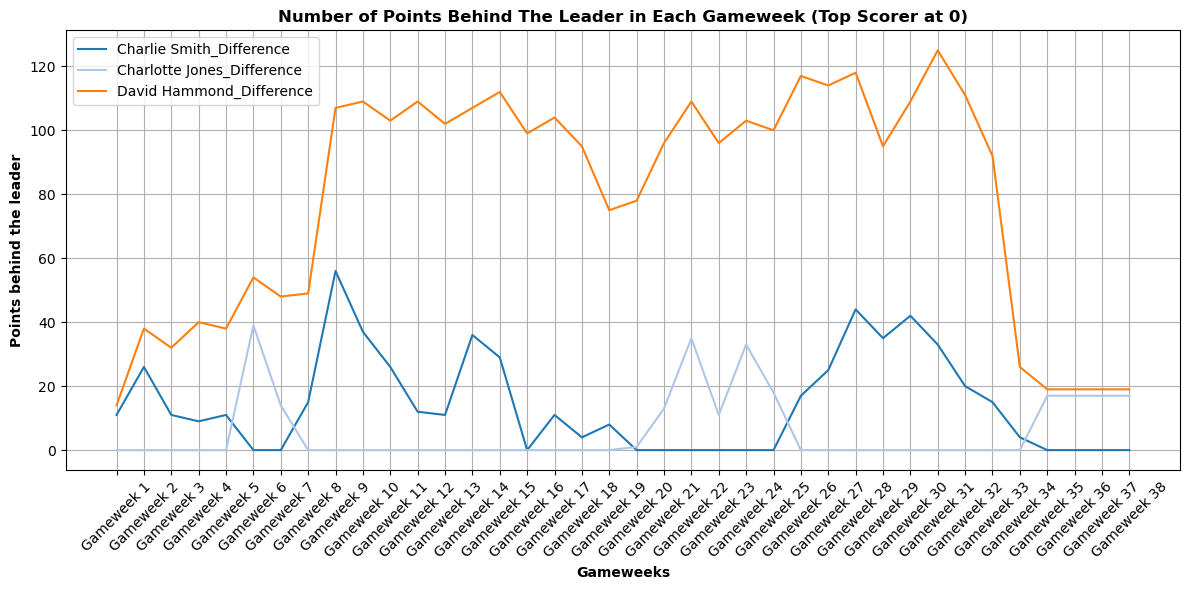

In [42]:
num_teams = len(cumulative_totals_df2.columns) - 3  # Exclude the first three columns

# Define a color palette
colors = sns.color_palette('tab20', num_teams)

# Create the plot
plt.figure(figsize=(12, 6))

# Selecting columns for plotting
teams_to_plot = cumulative_totals_df2.columns[num_teams:]

# Plot each team's points
for i, team in enumerate(teams_to_plot):
    plt.plot(cumulative_totals_df2.index, cumulative_totals_df2[team], label=team, color=colors[i])

# Adding labels and title
plt.xlabel('Gameweeks', fontweight='bold')
plt.ylabel('Points behind the leader', fontweight='bold')
plt.title('Number of Points Behind The Leader in Each Gameweek (Top Scorer at 0)', fontweight='bold')

# Show plot
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Weekly Points Behind Leader.jpg')
plt.show()
